# Project 1: Write a Data Science Blog Post
#### Revised
DSND Term 2 <br> <br>
09/19/2020
***
***
***

## 1) &nbsp; &nbsp; Business understanding

__Brief description:__<br>
The project goal is to write a 'data science blog post' about Airbnb listings in Boston and Seattle that answers three questions. To meet the goal questions needs to be phrased and data analysis shall be conducted to answer the questions.

__Questions:__
1. To which extent is data available on listings of Boston and Seattle Aribnbs? Is there a significant difference in the availability of data for the two cities?
2. Does more information provision correlate with more favorable outcomes for a host? E.g. better prices, more reviews or better review score values
3. Are there significant differences between the two cities’ apartment offers?

## 2) &nbsp; &nbsp; Data Understanding


### 2.1) &nbsp; &nbsp; Access the data

#### Import libraries

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

import time
import os

#### Setup working environment

In [2]:
pd.set_option('display.max_columns', None)

# To produce visualizations in notebook:
%matplotlib inline

os.chdir('/Users/erekasi/Documents/DA/002_DSND_Term-2/Project 1')
start_full = time.time()

#### Load the data

In [3]:
# Seattle datasets
dfs_cal=pd.read_csv('calendar_seattle.csv')
dfs_lis=pd.read_csv('listings_seattle.csv')
dfs_rev=pd.read_csv('reviews_seattle.csv')

In [4]:
# Boston datasets
dfb_cal=pd.read_csv('calendar_boston.csv')
dfb_lis=pd.read_csv('listings_boston.csv')
dfb_rev=pd.read_csv('reviews_boston.csv')

### 2.2) &nbsp; &nbsp; Explore the data

#### Size of the datasets

In [5]:
#Size of the datasets
print('Shape of calendar data on Seattle and Boston(rows, columns): ', dfs_cal.shape, ' & ', dfb_cal.shape)
print('Shape of listings data on Seattle and Boston(rows, columns): ', dfs_lis.shape, ' & ', dfb_lis.shape)
print('Shape of reviews data on Seattle and Boston(rows, columns): ', dfs_rev.shape, ' & ', dfb_rev.shape)

Shape of calendar data on Seattle and Boston(rows, columns):  (1393570, 4)  &  (1308890, 4)
Shape of listings data on Seattle and Boston(rows, columns):  (3818, 92)  &  (3585, 95)
Shape of reviews data on Seattle and Boston(rows, columns):  (84849, 6)  &  (68275, 6)


> __Finding__:<br>
Boston listings contains 3 more columns than Seattle's


In [6]:
#Check the difference in columns between the Boston and the Seattle listings datasets

dfs_lis_cols = set(dfs_lis.columns)
#print(dfs_lis_cols)

dfb_lis_cols = set(dfb_lis.columns)
df_lis_dif = dfb_lis_cols - dfs_lis_cols
print('Features only covered in the Boston dataset: ', df_lis_dif)

Features only covered in the Boston dataset:  {'interaction', 'access', 'house_rules'}


#### General information on the datasets

-------- __On the reviews datasets__

In [7]:
# General information on Boston reviews
dfb_rev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68275 entries, 0 to 68274
Data columns (total 6 columns):
listing_id       68275 non-null int64
id               68275 non-null int64
date             68275 non-null object
reviewer_id      68275 non-null int64
reviewer_name    68275 non-null object
comments         68222 non-null object
dtypes: int64(3), object(3)
memory usage: 3.1+ MB


In [8]:
# General information on Seattle reviews
dfs_rev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84849 entries, 0 to 84848
Data columns (total 6 columns):
listing_id       84849 non-null int64
id               84849 non-null int64
date             84849 non-null object
reviewer_id      84849 non-null int64
reviewer_name    84849 non-null object
comments         84831 non-null object
dtypes: int64(3), object(3)
memory usage: 3.9+ MB


>__Observations:__
>- `Comments` column is not complete with data in either cases.
>- IDs consist of numbers and are stored as integers. Reviews datasets can be connected to other datasets by `listing_id` and `reviewer_id`.

In [9]:
print('The earliest date in Boston reviews is ', dfb_rev.date.min(), '\n The latest date in Boston reviews is ', dfb_rev.date.max())

The earliest date in Boston reviews is  2009-03-21 
 The latest date in Boston reviews is  2016-09-06


In [10]:
print('The earliest date in Seattle reviews is ', dfs_rev.date.min(), '\n The latest date in Seattle reviews is ', dfs_rev.date.max())

The earliest date in Seattle reviews is  2009-06-07 
 The latest date in Seattle reviews is  2016-01-03


>__Observation:__ Reviews for Boston and Seattle stem from a similar period of time, between 2009 and 2016.

In [11]:
dfs_rev.head(3)

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."


In [12]:
dfb_rev.head(3)

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...
2,1178162,5003196,2013-06-06,6449554,Sebastian,We really enjoyed our stay at Islams house. Fr...


>__Observation:__ `Comments` are of free text entries.

-------- __On the listings datasets__

In [13]:
#To see the full list of the listings datasets' features
dfb_lis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 95 columns):
id                                  3585 non-null int64
listing_url                         3585 non-null object
scrape_id                           3585 non-null int64
last_scraped                        3585 non-null object
name                                3585 non-null object
summary                             3442 non-null object
space                               2528 non-null object
description                         3585 non-null object
experiences_offered                 3585 non-null object
neighborhood_overview               2170 non-null object
notes                               1610 non-null object
transit                             2295 non-null object
access                              2096 non-null object
interaction                         2031 non-null object
house_rules                         2393 non-null object
thumbnail_url                       2986

>__Observation__: Several columns are fully empty in the Boston listings dataset: `neighbourhood_group_cleansed`, `has_availability`, `license`, and `jurisdtiction_names`

In [14]:
dfs_lis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
id                                  3818 non-null int64
listing_url                         3818 non-null object
scrape_id                           3818 non-null int64
last_scraped                        3818 non-null object
name                                3818 non-null object
summary                             3641 non-null object
space                               3249 non-null object
description                         3818 non-null object
experiences_offered                 3818 non-null object
neighborhood_overview               2786 non-null object
notes                               2212 non-null object
transit                             2884 non-null object
thumbnail_url                       3498 non-null object
medium_url                          3498 non-null object
picture_url                         3818 non-null object
xl_picture_url                      3498

>__Observation:__ For the Seattle listings dataset, only the column `license` is fully empty.

In [15]:
dfb_lis.head(3)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",NaN,"The bus stop is 2 blocks away, and frequent. B...","You will have access to 2 bedrooms, a living r...",NaN,Clean up and treat the home the way you'd like...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,31303940,https://www.airbnb.com/users/show/31303940,Virginia,2015-04-15,"Boston, Massachusetts, United States",We are country and city connecting in our deck...,NaN,NaN,NaN,f,https://a2.muscache.com/im/pictures/5936fef0-b...,https://a2.muscache.com/im/pictures/5936fef0-b...,Roslindale,1,1,"['email', 'phone', 'facebook', 'reviews']",t,f,"Birch Street, Boston, MA 02131, United States",Roslindale,Roslindale,NaN,Boston,MA,02131,Boston,"Boston, MA",US,United States,42.282619,-71.133068,t,House,Entire home/apt,4,1.5,2.0,3.0,Real Bed,"{TV,""Wireless Internet"",Kitchen,""Free Parking ...",NaN,$250.00,NaN,NaN,NaN,$35.00,1,$0.00,2,1125,2 weeks ago,NaN,0,0,0,0,2016-09-06,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...","If you don't have a US cell phone, you can tex...",Plenty of safe street parking. Bus stops a few...,Apt has one more bedroom (which I use) and lar...,"If I am at home, I am likely working in my hom...",Pet friendly but please confirm with me if the...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,2572247,https://www.airbnb.com/users/show/2572247,Andrea,2012-06-07,"Boston, Massachusetts, United States",I live in Boston and I like to travel and have...,within an hour,100%,100%,f,https://a2.muscache.com/im/users/2572247/profi...,https://a2.muscache.com/im/users/2572247/profi...,Roslindale,1,1,"['email', 'phone', 'facebook', 'linkedin', 'am...",t,t,"Pinehurst Street, Boston, MA 02131, United Sta

In [16]:
dfs_lis.head(3)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.636289,-122.371025,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$85.00,NaN,NaN,NaN,NaN,2,$5.00,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/im/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,5177328,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98%,100%,t,https://a0.muscache.com/ac/users/5177328/profi...,https://a0.muscache.com/ac/users/5177328/profi...,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.639123,-122.365666,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,$150.00,"$1,000.00","$3,000.00",$100.00,$40.00,1,$0.00,2,90,today,t,13,13,16,291,2016-01-04,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazi

>__Observations:__ <br>

>- `host_response_rate` and `host_acceptance_rate` are completed in percentage format.
>- `host_is_superhost`, `host_has_profile_pic`, `host_identity_verified`, `is_location_exact`, `requires_license`, `instant_bookable`, `require_guest_profile_picture`, and `require_guest_phone_verification` are Booleans, coded as "f" for false and "t" for true, presumably.
>- `host_verifications` is a list of strings
>- `street` is a complete addres
>- `amenities` is a set of strings, which are only occasionally marked by apostrophies
>- `price`, `weekly_price`, `monthly_price`,`cleaning_fee`, and `extra_people` are written as strings, started by dollar sign
>- `calendar_updated` is expressed as a combination of numbers and text

In [17]:
print("In Boston listings, the earliest 'last scraped' date is ", dfb_lis.last_scraped.min()," and the latest is ", dfb_lis.last_scraped.max(), '. \n',
     "In Seattle listings, the earliest 'last scraped' date is ", dfs_lis.last_scraped.min()," and the latest is ", dfs_lis.last_scraped.max()
     )

In Boston listings, the earliest 'last scraped' date is  2016-09-07  and the latest is  2016-09-07 . 
 In Seattle listings, the earliest 'last scraped' date is  2016-01-04  and the latest is  2016-01-04


>__Conclusion__: `last_scraped` can be dropped as it does not add any value to the current analysis.

-------- __On the reviews datasets__

In [18]:
dfs_cal.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [19]:
dfb_cal.head()

,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN


>__Observation:__ Availability data is at least partially completed in the calendar datasets as `available`, expressed as a Boolean.

## 3) &nbsp; &nbsp; Data preparation

### 3.1) &nbsp; &nbsp; Connect datasets

In [20]:
#Drop columns from Boston listings which are missing from Seattle listings
dfb_lis = dfb_lis.drop(columns=['interaction', 'house_rules', 'access'])

In [21]:
dfb_lis.shape

(3585, 92)

In [22]:
#Rename some columns to enable merging
dfs_lis = dfs_lis.rename(columns={'id':'listing_id'})
dfb_lis = dfb_lis.rename(columns={'id':'listing_id'})

In [23]:
#Merge listings and calendar datasets
start = time.time()

dfs = pd.merge(dfs_lis, dfs_cal, how = 'outer')
dfb = pd.merge(dfb_lis, dfb_cal, how = 'outer')

end = time.time()
t = end - start
print('------------ \n Time spent on task execution: \n ', int(t/60), 'minute(s)', round(t%60,2), 'second(s)')

------------ 
 Time spent on task execution: 
  0 minute(s) 27.19 second(s)


>__Comment:__ This merging will not be utilized finally in this script.

In [24]:
dfs.shape[0]

1393858

In [25]:
dfb.shape[0]

1310166

In [26]:
#Add a city column to differentiate records by city in the concatenated dataset
dfs['seattle'] = 1
dfb['seattle'] = 0

In [27]:
#Join Seattle and Boston datasets

start = time.time()

df = pd.concat([dfs, dfb])
end = time.time()
t = end - start
print('------------ \n Time spent on task execution: \n ', int(t/60), 'minute(s)', round(t%60,2), 'second(s)')

------------ 
 Time spent on task execution: 
  0 minute(s) 9.07 second(s)


In [28]:
print('Proportion of Seattle data in the complete dataset:')
dfs.shape[0]/df.shape[0]

Proportion of Seattle data in the complete dataset:


0.5154754543598725

In [29]:
print('Proportion of Boston data in the complete dataset:')
dfb.shape[0]/df.shape[0]

Proportion of Boston data in the complete dataset:


0.4845245456401275

>__Conclusion:__ There is slightly more data on Seattle than Boston in the joint and concatenated data set.

In [30]:
df.columns.sort_values()

Index(['accommodates', 'amenities', 'availability_30', 'availability_365',
       'availability_60', 'availability_90', 'available', 'bathrooms',
       'bed_type', 'bedrooms', 'beds', 'calculated_host_listings_count',
       'calendar_last_scraped', 'calendar_updated', 'cancellation_policy',
       'city', 'cleaning_fee', 'country', 'country_code', 'date',
       'description', 'experiences_offered', 'extra_people', 'first_review',
       'guests_included', 'has_availability', 'host_about',
       'host_acceptance_rate', 'host_has_profile_pic', 'host_id',
       'host_identity_verified', 'host_is_superhost', 'host_listings_count',
       'host_location', 'host_name', 'host_neighbourhood', 'host_picture_url',
       'host_response_rate', 'host_response_time', 'host_since',
       'host_thumbnail_url', 'host_total_listings_count', 'host_url',
       'host_verifications', 'instant_bookable', 'is_location_exact',
       'jurisdiction_names', 'last_review', 'last_scraped', 'latitude',
    

### 3.2) &nbsp; &nbsp; Clean price data

In [31]:
#Create a function to clean price data

def clean_price(x):
    '''
    Function to clean price data
    
    Clean price data from $ mark and thousand separator.
    
    Parameter:
        x (object): $ sign and a number expressing price in USD

    Returns:
        x (object): price without $ sign or thousand separator
    
    '''
    
    if isinstance(x, str):
        return(x.replace('$', '').replace(',', ''))    
    return(x)

In [32]:
#Apply function to all price features which require cleaning

for i in ['price', 'weekly_price', 'monthly_price', 'cleaning_fee', 'extra_people']:
    
          df[i] = df[i].apply(clean_price).astype('float')

### 3.3) &nbsp; &nbsp; Handling missing data

In [67]:
#Create a feature to count missing values

#df['missing_values'] = df.apply(lambda x: x.isnull().count(),axis=1) #This approach would require excessive amount of timestart = time.time()

start = time.time()

df['missing_values'] = df.isnull().sum(axis=1)

end = time.time()
t = end - start
print('------------ \n Time spent on task execution: \n ', int(t/60), 'minute(s)', round(t%60,2), 'second(s)')

------------ 
 Time spent on task execution: 
  0 minute(s) 7.38 second(s)


>__Note:__ The following drop and imputation steps were decided upon data exploration that is currently available in phase 4.1.

#### 3.3.1) &nbsp; &nbsp; Drop columns

In [33]:
#Identify features where minimum 60% of the values is missing
most_missing60 = df.columns[np.sum(df.isnull())/df.shape[0] >= .6]
len(most_missing60)

33

In [34]:
#Drop the columns identified above
df63 = df.drop(columns = most_missing60)
df63.shape

(2704024, 62)

In [35]:
#Sorted list of columns which remain in the dataframe
df63.columns.sort_values()

Index(['accommodates', 'amenities', 'availability_30', 'availability_365',
       'availability_60', 'availability_90', 'available', 'bathrooms',
       'bed_type', 'bedrooms', 'beds', 'calculated_host_listings_count',
       'calendar_last_scraped', 'calendar_updated', 'cancellation_policy',
       'city', 'country', 'country_code', 'date', 'description',
       'experiences_offered', 'extra_people', 'guests_included',
       'host_has_profile_pic', 'host_id', 'host_identity_verified',
       'host_is_superhost', 'host_listings_count', 'host_location',
       'host_name', 'host_picture_url', 'host_since', 'host_thumbnail_url',
       'host_total_listings_count', 'host_url', 'host_verifications',
       'instant_bookable', 'is_location_exact', 'last_scraped', 'latitude',
       'listing_id', 'listing_url', 'longitude', 'market', 'maximum_nights',
       'minimum_nights', 'name', 'neighbourhood_cleansed', 'number_of_reviews',
       'picture_url', 'price', 'property_type',
       'requi

In [36]:
#Drop columns which do not add value to the current dataset but potentially contain several missing values
df56 = df63.drop(['street', 'market', 'city', 'state', 'country', 'country_code', 'smart_location'], axis = 1)
df56.shape

(2704024, 55)

#### 3.3.2) &nbsp; &nbsp; Drop rows

In [40]:
#Drop rows with more than 40 missing values

df56r = df56[df56['missing_values']<40]
df56r.shape

(1093485, 56)

#### 3.3.3) &nbsp; &nbsp; Impute numeric features

In [41]:
#Assess number of missing values by numeric variable
df56r.select_dtypes(include='number').isnull().sum()

listing_id                           0
scrape_id                            0
host_id                              0
host_listings_count                 71
host_total_listings_count           71
latitude                             0
longitude                            0
accommodates                         0
bathrooms                         6517
bedrooms                          3979
beds                              2025
price                                0
guests_included                      0
extra_people                         0
minimum_nights                       0
maximum_nights                       0
availability_30                      0
availability_60                      0
availability_90                      0
availability_365                     0
number_of_reviews                    0
calculated_host_listings_count       0
seattle                              0
missing_values                       0
dtype: int64

In [42]:
col_to_fil = [
    'host_listings_count',
    'host_total_listings_count',
    'bathrooms',
    'bedrooms',
    'beds'
]

In [43]:
#Fill missing numeric values by mean

for i in col_to_fil:
    df56r[i] = df56r[i].fillna(df56r[i].mean())

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [44]:
#Control
df56r.select_dtypes(include='number').isnull().sum()

listing_id                        0
scrape_id                         0
host_id                           0
host_listings_count               0
host_total_listings_count         0
latitude                          0
longitude                         0
accommodates                      0
bathrooms                         0
bedrooms                          0
beds                              0
price                             0
guests_included                   0
extra_people                      0
minimum_nights                    0
maximum_nights                    0
availability_30                   0
availability_60                   0
availability_90                   0
availability_365                  0
number_of_reviews                 0
calculated_host_listings_count    0
seattle                           0
missing_values                    0
dtype: int64

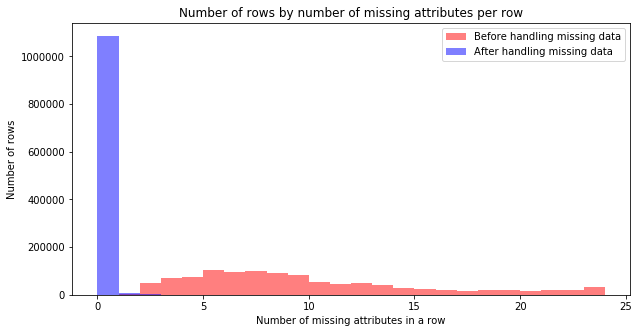

In [45]:
#Control

plt.figure(figsize=(10,5))
plt.hist(df.isnull().sum(axis=1), range(0,25), color = 'red', alpha=.5)
plt.hist(df56r.isnull().sum(axis=1), range(0,25), color = 'blue', alpha=.5)
plt.title('Number of rows by number of missing attributes per row')
plt.xlabel('Number of missing attributes in a row')
plt.ylabel('Number of rows')
plt.legend(['Before handling missing data', 'After handling missing data'])

### 3.4) &nbsp; &nbsp; Changing some further data types

I.e. beyond price features.

In [46]:
#Change IDs to object to easily exclude these from correlation matrices

id_list = ['host_id', 'listing_id', 'scrape_id']

for i in id_list:
    
          df[i] = df[i].astype('object')

In [47]:
for i in id_list:
    
          df56r[i] = df56r[i].astype('object')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [53]:
#Control
df56r['host_id'].dtype

dtype('O')

## 4) &nbsp; &nbsp; Data Modeling

### 4.1) &nbsp; &nbsp; Question 1:
To which extent is data available on listings of Boston and Seattle Aribnbs? Is there a significant difference in the availability of data for the two cities?

#### 4.1.1) &nbsp; &nbsp; Assess missing data per feature

##### Analyze - Assess missing data

In [54]:
#Create a dataframe of the number of missing values per column
start = time.time()

mis_df = pd.DataFrame(np.sum(df.isnull())/df.shape[0])
mis_df.columns = ["missing_proportion"]
mis_df_sort = mis_df.sort_values(by=["missing_proportion"])

###Create feature from the index
mis_df_sort['feature'] = mis_df_sort.index

end = time.time()
t = end - start
print('------------ \n Time spent on task execution: \n ', int(t/60), 'minute(s)', round(t%60,2), 'second(s)')

------------ 
 Time spent on task execution: 
  0 minute(s) 10.34 second(s)


##### Visualize - Missing data per feature

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


------------ 
 Time spent on task execution: 
  0 minute(s) 3.52 second(s)


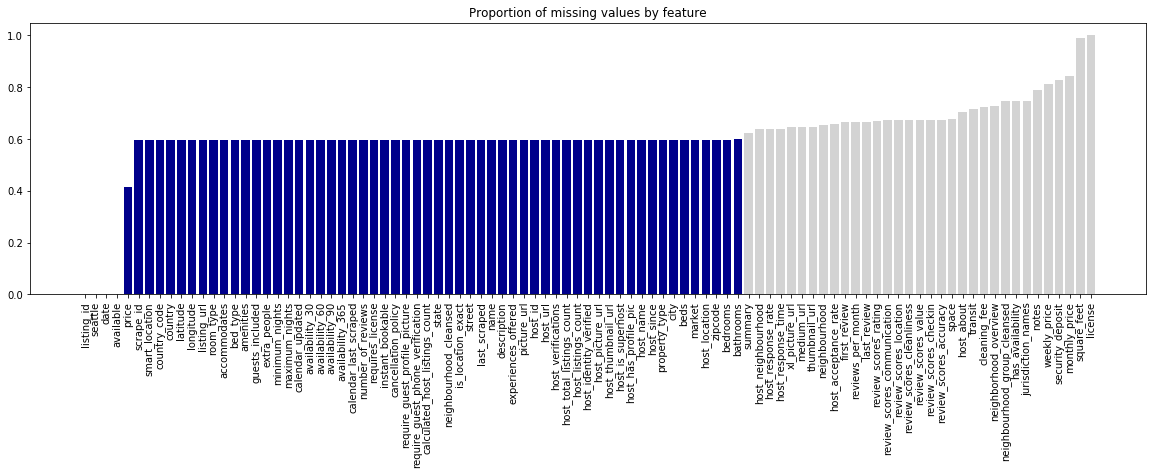

In [55]:
#Visualizing proportion of missing values per feature
start = time.time()

plt.figure(figsize=(20,5))

x = range(mis_df_sort.shape[0])
y = mis_df_sort['missing_proportion']

col = []

for i in y:
    if i <= .6:
        col.append('darkblue')
    else:
        col.append('lightgray')
        plt.bar(x,y)

plt.bar(x,y,color=col)

ax = plt.subplot()
ax.set_xticks(range(mis_df_sort.shape[0]))
ax.set_xticklabels(mis_df_sort['feature'], rotation = 90)
plt.title('Proportion of missing values by feature')
plt.savefig("Proportion_missing_by_feature.png")

end = time.time()
t = end - start
print('------------ \n Time spent on task execution: \n ', int(t/60), 'minute(s)', round(t%60,2), 'second(s)')

>__Observations__:
>- There are 4 features for which the proportion of missing values is around zero: `listing_id`, `seattle` (added during Data preparation), `date` and `available`, of which the latter two stem from the `Calendar` datasets.
>- `Price` is the feature which is not fully complete in the dataset but the proportion of missing values is below 50% for it.
>- There is a large set of features for which the extent of missing values is around 60% (marked by blue).
>- There are features for which the dataset contains hardly any data entries, e.g. `square_feet`.

#### 4.1.2) &nbsp; &nbsp; Assess missing data per feature by city

##### Analyze - Missing data by city

In [56]:
dfs_mis = pd.DataFrame(np.sum(dfs.isnull())/dfs.shape[0])

In [57]:
dfs_mis.head(3)

,0
listing_id,0.000000
listing_url,0.510162
scrape_id,0.510162


In [58]:
dfb_mis = pd.DataFrame(np.sum(dfb.isnull())/dfb.shape[0])

In [59]:
dfb_mis.head(3)

,0
listing_id,0.000000
listing_url,0.686512
scrape_id,0.686512


In [60]:
#Create a summary dataset of proportion of missing values per feature grouped by city
df_mis_gro = pd.merge(dfb_mis, dfs_mis, left_index=True, right_index=True)
df_mis_gro.columns = ['Boston', 'Seattle']
df_mis_gro['Difference'] = dfb_mis - dfs_mis

In [61]:
df_mis_gro.shape

(95, 3)

In [62]:
df_mis_gro.head(3)

,Boston,Seattle,Difference
listing_id,0.000000,0.000000,0.00000
listing_url,0.686512,0.510162,0.17635
scrape_id,0.686512,0.510162,0.17635


##### Visualize - Differences in missing data by city

In [71]:
#Compare difference in the proportion of missing values per feature by city

df_mis_gro.style.bar(subset=['Difference'], width=50, align='mid', color=['#d65f5f', '#5fba7d'])
#fig1=plt.gcf()
#plt.savefig('difference-in-missing.png')

,Boston,Seattle,Difference
listing_id,0,0,0
listing_url,0.686512,0.510162,0.17635
scrape_id,0.686512,0.510162,0.17635
last_scraped,0.686512,0.510162,0.17635
name,0.686512,0.510162,0.17635
summary,0.711819,0.537917,0.173902
space,0.767433,0.588916,0.178517
description,0.686512,0.510162,0.17635
experiences_offered,0.686512,0.510162,0.17635
neighborhood_overview,0.812112,0.650281,0.161831


> __Comment:__<br>
    >- There are only 2 features in the joint and merged dataset of which no values are missing: `listing_id` and `seattle`.
    >- As also observed earlier, there are no data entries for the feature `license`.
    >- The extent of missing values is significantly different for the two cities in case of the following features:
    >    - `neighbourhood_group_cleansed`
    >    - `has_availability`
    >    - `jurisdiction_names`, <br>
    >as for Boston, there are no data entries for these fields.

#### 4.1.3) &nbsp; &nbsp; Missing value threshold vs. number of features

##### Analyze - No. of features by missing value threshold

In [63]:
#Calculate the number of remaining features if dropping features by proportion of missing values

In [64]:
start = time.time()

#Maximum % missing
threashold = list(range(40,100,5))
remaining_features = []

for i in threashold:
    remaining_features.append(len(df.columns[np.sum(df.isnull())/df.shape[0] < i/100]))
    
threashold_divided = [i/100 for i in threashold]

#Creating dataframe for visualization
df_thr_fea = pd.DataFrame({"threashold":threashold_divided, "number_of_features": remaining_features})

end = time.time()
t = end - start
print('------------ \n Time spent on task execution: \n ', int(t/60), 'minute(s)', round(t%60,2), 'second(s)')

------------ 
 Time spent on task execution: 
  1 minute(s) 28.22 second(s)


In [65]:
df_thr_fea

,threashold,number_of_features
0,0.40,4
1,0.45,5
2,0.50,5
3,0.55,5
4,0.60,62
5,0.65,69
6,0.70,82
7,0.75,89
8,0.80,90
9,0.85,93


##### Visualize - No. of features by missing value threshold

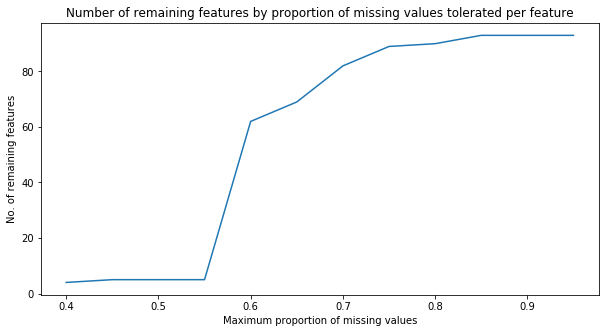

In [66]:
plt.figure(figsize=(10,5))
plt.plot(df_thr_fea['threashold'], df_thr_fea['number_of_features'])
plt.xlabel("Maximum proportion of missing values")
plt.title("Number of remaining features by proportion of missing values tolerated per feature")
plt.ylabel('No. of remaining features')

plt.savefig("threashold_features.png")
plt.show()

>__Conclusion:__<br>
Keeping the proportion of missing values in features below 60% would result in a vary narrow set of features available. Thus there is need for making a compromise in the proportion of missing values tolerated to keep a set of features wide enough to make some reasonable analyses on it.

#### 4.1.4) &nbsp; &nbsp; Missing values per record

##### Analyze - missing values per record

In [68]:
#See the distribution of the proportion of missing values per row
df['missing_values'].describe()/df.shape[1]

count    28166.916667
mean         0.603480
std          0.416105
min          0.010417
25%          0.104167
50%          0.937500
75%          0.947917
max          0.947917
Name: missing_values, dtype: float64

>__Comment__: There is a very limited number of rows where the proportion of missing values is below 90%. It reaches somewhere between 25 and 50% of the rows.

##### Visualize - Missing values per record

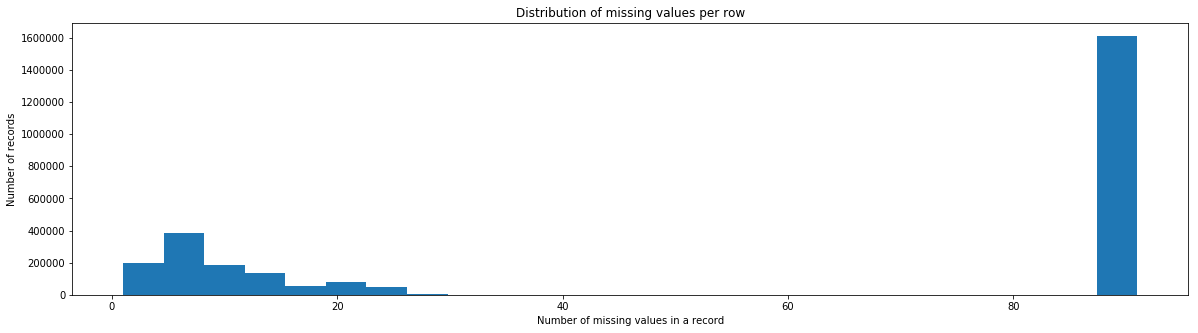

In [69]:
#Distribution of missing values per record

plt.figure(figsize=(20,5))
plt.hist(df['missing_values'], bins=25)
plt.xlabel('Number of missing values in a record')
plt.ylabel('Number of records')
plt.title('Distribution of missing values per row')
plt.savefig("missing_values_per_row_histogram.png")

>__Obbservation:__
- There are 200,000 records at most for which almost all features contain data (missing 1-4 features / record at most)
- There are more than 1.4 million rows in the dataset for which more than 80 out of 96 features have missing values.
- For the remaining records, around 5 - 30 features are missing.

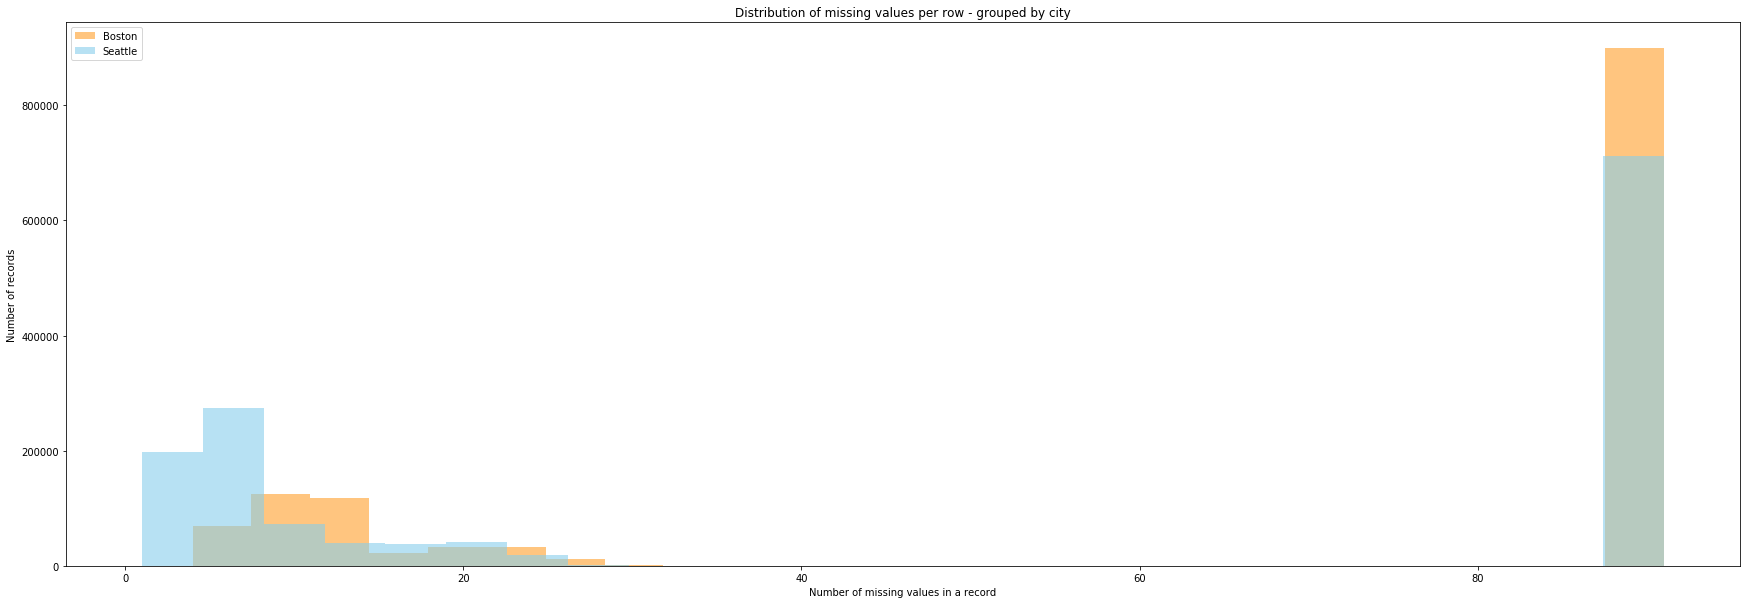

In [70]:
#Distribution of missing values per record by city

plt.figure(figsize=(30,10))
plt.hist(df['missing_values'][df.seattle == 0], bins=25, alpha = .5, label='Boston', color = 'darkorange')
plt.hist(df['missing_values'][df.seattle == 1], bins=25, alpha = .6, label='Seattle', color = 'skyblue')
plt.xlabel('Number of missing values in a record')
plt.ylabel('Number of records')
plt.legend(loc='upper left')
plt.title('Distribution of missing values per row - grouped by city')
plt.savefig("missing_per_record_by_city.png")

>__Observations:__
- There are significant differences in the distribution of missing features per record between Boston and Seattle.
- There are far more records, around 200,000 for Seattle which contain almost all features (vs. around 0 for Boston)
- There are far more records, around 500,000 for Seattle which contain at least ~80 features  out of 96 (vs. less than 100,000 for Boston)
- There are significantly more records for Boston where almost all features are missing, cca. 900,000 (vs. cca. 700,000 for Seattle).

### 4.2) &nbsp; &nbsp; Question 2:
Does more information provision correlate with more favorable outcomes for a host? E.g. better prices, more reviews or better review score values.

>__Assumption:__ <br> more information available makes an accommodation more attractive --> higher prices or better reviews

#### 4.2.1) Price by number of missing values per record
##### Analysis by visualization

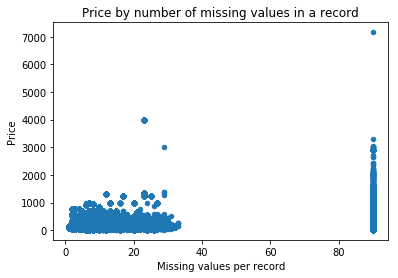

In [71]:
df.plot(x = 'missing_values', y = 'price', kind = 'scatter')
plt.title('Price by number of missing values in a record')
plt.xlabel('Missing values per record')
plt.ylabel('Price')
plt.savefig("price_by_missing_values_per_record.png")

>__Comment:__<br>
    Based on a simple visual approach, and disregarding seemingly outlier values, there is no clear correlation between the number of missing values of a record and the corresponding price level. However, there might be more relatively expensive accommodations among the ones with the most missing values.

#### 4.2.2) Number of reviews by number of missing values per record
##### Analysis by visualization

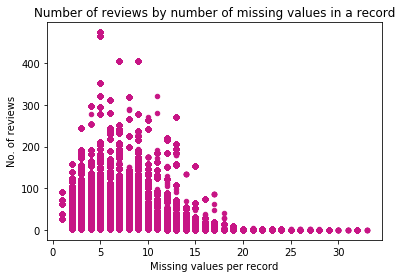

In [72]:
df.plot(x = 'missing_values', y = 'number_of_reviews', kind = 'scatter', color = 'mediumvioletred')
plt.title('Number of reviews by number of missing values in a record')
plt.xlabel('Missing values per record')
plt.ylabel('No. of reviews')
plt.savefig("no_of_reviews_by_missing_values_per_record.png")

>__Comment:__<br>
    It might occur that accommodations for which less information is available online are less popular, assuming that number of reviews is a valid proxy for popularity.

#### 4.2.3) Number of reviews per month by number of missing values per record
##### Analysis by visualization

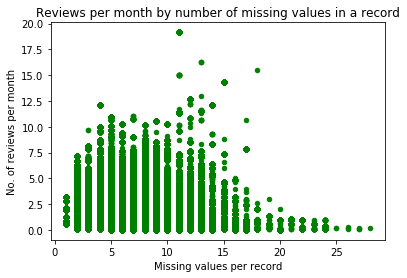

In [73]:
df.plot(x = 'missing_values', y = 'reviews_per_month', kind = 'scatter', color = 'green')
plt.title('Reviews per month by number of missing values in a record')
plt.xlabel('Missing values per record')
plt.ylabel('No. of reviews per month')
plt.savefig("no_of_reviews_per_month_by_missing_values_per_record.png")

>__Comment:__
- There is seemingly no data available on reviews per month for records (accommodations) in which more than cca. 30 values are missing.
- Interestingly, not those records receive the most review per month which have the least missing values.

#### 4.2.4) Average review score by number of missing values per record
##### Analysis by visualization

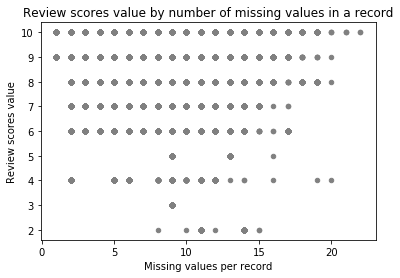

In [74]:
df.plot(x = 'missing_values', y = 'review_scores_value', kind = 'scatter', color = 'grey')
plt.title('Review scores value by number of missing values in a record')
plt.xlabel('Missing values per record')
plt.ylabel('Review scores value')
plt.savefig("review_scores_value_by_missing_values_per_record.png")

>__Comment:__<br>
    There are seemingly no review scores values available in the dataset for records where are more than cca. 25 missing values in a record.

### 4.3) &nbsp; &nbsp; Question 3:
Are there significant differences between the two cities’ apartment offers?

#### 4.3.1) &nbsp; &nbsp; No. of unique hosts or listings
##### Analysis without visualization

In [75]:
#Number of unique hosts by city
print ('----------------- \n Number of unique hosts by city:')
df.groupby('seattle')['host_id'].nunique()

----------------- 
 Number of unique hosts by city:


seattle
0    2181
1    2751
Name: host_id, dtype: int64

In [76]:
#Number of unique locations by city
print ('----------------- \n Number of unique listings by city:')
df.groupby('seattle')['listing_id'].nunique()

----------------- 
 Number of unique listings by city:


seattle
0    3585
1    3818
Name: listing_id, dtype: int64

#### 4.3.2) &nbsp; &nbsp; Room types by city
##### Analysis by visualization

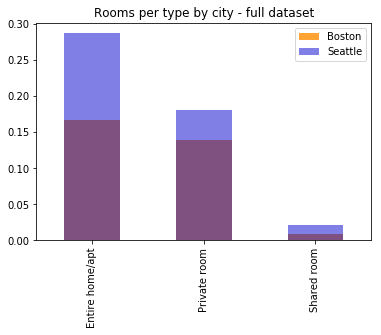

In [77]:
#Analysis on the dataset including large volume of missing data
room_type_val_b = df[df.seattle == 0].room_type.value_counts()
room_type_val_s = df[df.seattle == 1].room_type.value_counts()


(room_type_val_b/df[df.seattle == 0].shape[0]).plot(kind="bar", color='darkorange', alpha = .8);
(room_type_val_s/df[df.seattle == 1].shape[0]).plot(kind="bar", color='mediumblue', alpha = .5);
plt.legend(['Boston', 'Seattle'])
plt.title("Rooms per type by city - full dataset");

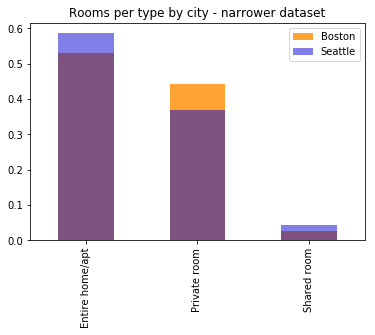

In [78]:
#Analysis on the dataset for which missing data was handled
room_type_val_b = df56r[df56r.seattle == 0].room_type.value_counts()
room_type_val_s = df56r[df56r.seattle == 1].room_type.value_counts()


(room_type_val_b/df56r[df56r.seattle == 0].shape[0]).plot(kind="bar", color='darkorange', alpha = .8);
(room_type_val_s/df56r[df56r.seattle == 1].shape[0]).plot(kind="bar", color='mediumblue', alpha = .5);
plt.legend(['Boston', 'Seattle'])
plt.title("Rooms per type by city - narrower dataset");
plt.savefig('rooms_per_type_by_city.png')

>__Comment:__ In Boston, the proportion of private rooms is almost 10 percentage point larger than in Seattle. While in Seattle, the proportion of entire home/appartment and that of shared room is slightly larger than in Boston.

#### 4.3.3) &nbsp; &nbsp; Distribution of cancellation policies by city
##### Analysis by visualization

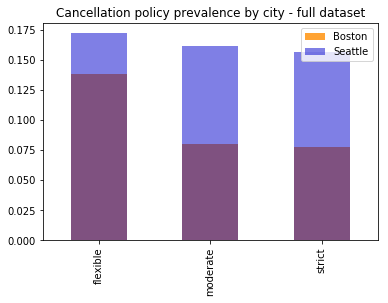

In [79]:
#Analysis on the dataset including large volume of missing data
cancellation_pol_b = df[df.seattle == 0].cancellation_policy.value_counts()
cancellation_pol_s = df[df.seattle == 1].cancellation_policy.value_counts()

(cancellation_pol_b/df[df.seattle == 0].shape[0]).plot(kind="bar", color='darkorange', alpha = .8);
(cancellation_pol_s/df[df.seattle == 1].shape[0]).plot(kind="bar", color='mediumblue', alpha = .5);
plt.legend(['Boston', 'Seattle'])
plt.title("Cancellation policy prevalence by city - full dataset");

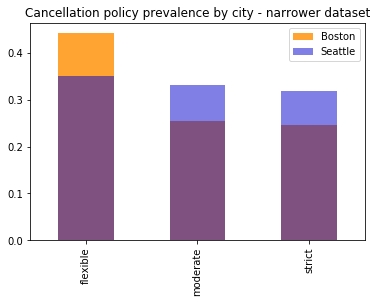

In [80]:
#Analysis on the dataset for which missing data was handled
cancellation_pol_b = df56r[df56r.seattle == 0].cancellation_policy.value_counts()
cancellation_pol_s = df[df.seattle == 1].cancellation_policy.value_counts()

(cancellation_pol_b/df56r[df56r.seattle == 0].shape[0]).plot(kind="bar", color='darkorange', alpha = .8);
(cancellation_pol_s/df56r[df56r.seattle == 1].shape[0]).plot(kind="bar", color='mediumblue', alpha = .5);
plt.legend(['Boston', 'Seattle'])
plt.title("Cancellation policy prevalence by city - narrower dataset");
plt.savefig('rooms_per_cancellation_policy_by_city.png')

>__Comment:__ The proportion of flexible policy applied on cancellations is almost 10 percentage point larger in Boston than in Seattle. Both the proportion of moderate and strict policies is larger in Seattle Airbnbs than in Boston.

#### 4.3.4) &nbsp; &nbsp; Distribution of number of beds by city
##### Analysis by visualization

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


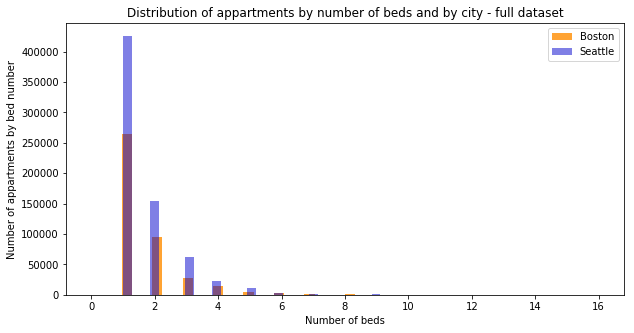

In [81]:
#Distribution of appartments by number of beds - full dataset
plt.figure(figsize=(10,5))
plt.hist(df['beds'][df['seattle'] == 0], color='darkorange', alpha = .8, bins = 50)
plt.hist(df['beds'][df['seattle'] == 1], color='mediumblue', alpha = .5, bins = 50)
plt.legend(['Boston', 'Seattle'])
plt.title("Distribution of appartments by number of beds and by city - full dataset");
plt.xlabel('Number of beds')
plt.ylabel('Number of appartments by bed number')
plt.savefig('no_of_beds_by_city.png')

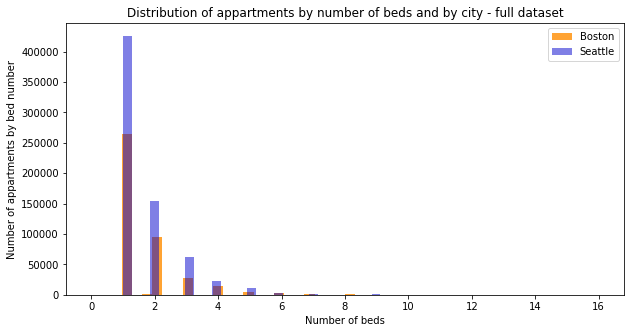

In [82]:
#Distribution of appartments by number of beds - narrower dataset
plt.figure(figsize=(10,5))
plt.hist(df56r['beds'][df56r['seattle'] == 0], color='darkorange', alpha = .8, bins = 50)
plt.hist(df56r['beds'][df56r['seattle'] == 1], color='mediumblue', alpha = .5, bins = 50)
plt.legend(['Boston', 'Seattle'])
plt.title("Distribution of appartments by number of beds and by city - full dataset");
plt.xlabel('Number of beds')
plt.ylabel('Number of appartments by bed number')
plt.savefig('no_of_beds_by_city2.png')

>__Comment:__ The distribution of appartments by number of beds is similar for Boston and Seattle.

#### 4.3.5) &nbsp; &nbsp; Distribution of number of reviews per listing by city
##### Analysis by visualization

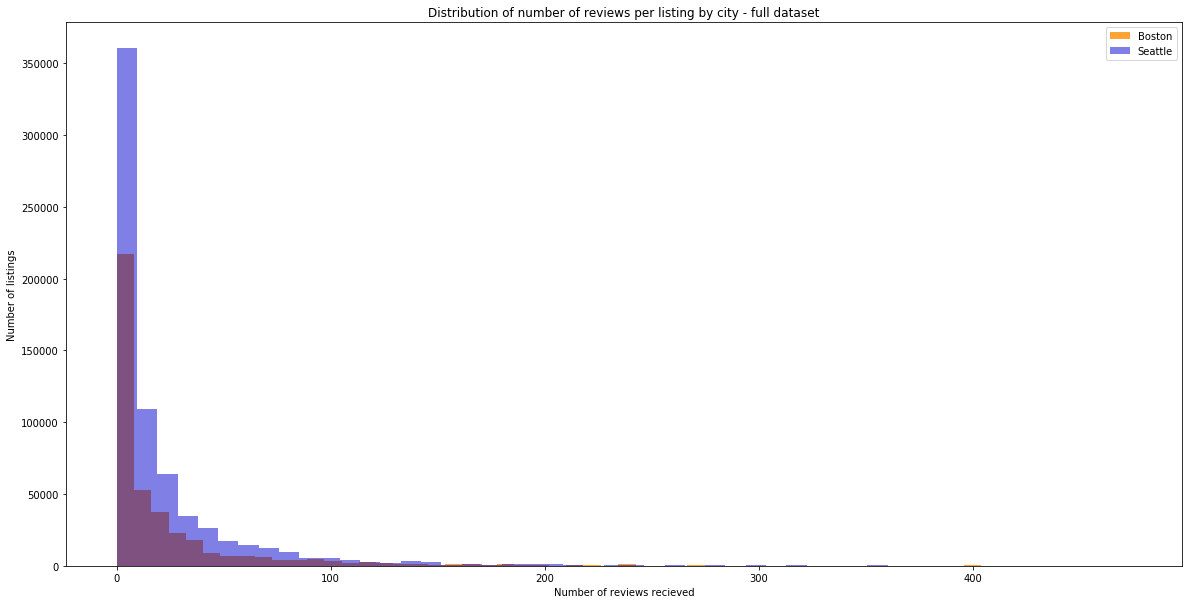

In [83]:
#Distribution of number of reviews received - full dataset
plt.figure(figsize=(20,10))
plt.hist(df['number_of_reviews'][df['seattle'] == 0], color='darkorange', alpha = .8, bins = 50)
plt.hist(df['number_of_reviews'][df['seattle'] == 1], color='mediumblue', alpha = .5, bins = 50)
plt.legend(['Boston', 'Seattle'])
plt.title("Distribution of number of reviews per listing by city - full dataset");
plt.xlabel('Number of reviews recieved')
plt.ylabel('Number of listings')
plt.savefig('no_of_reviews_by_city.png')

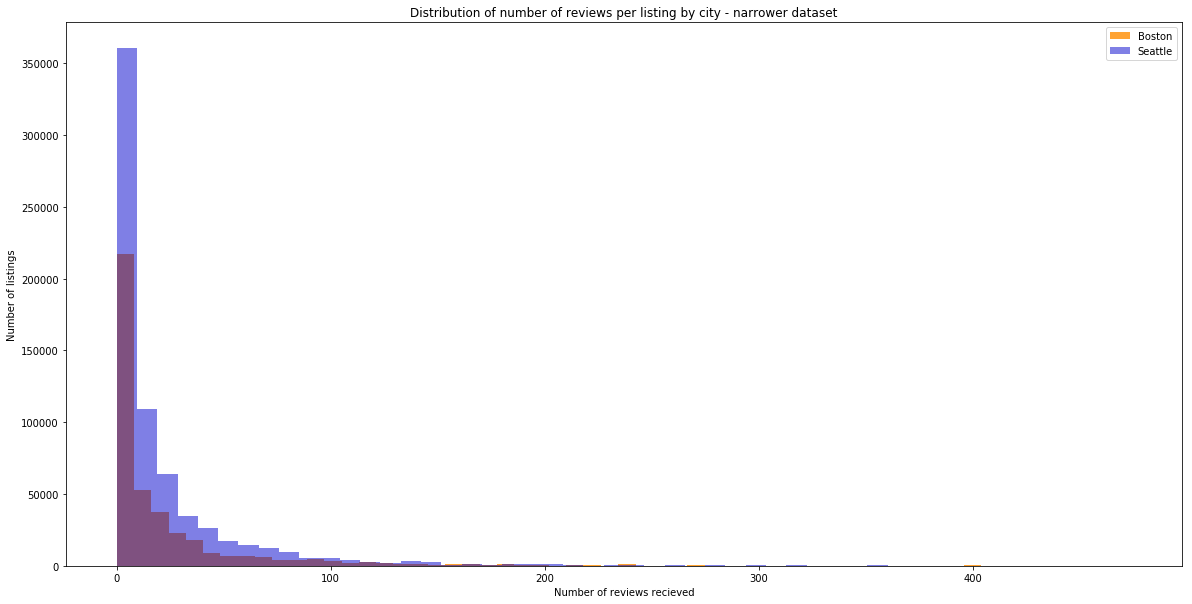

In [84]:
#Distribution of number of reviews received - full dataset
plt.figure(figsize=(20,10))
plt.hist(df56r['number_of_reviews'][df56r['seattle'] == 0], color='darkorange', alpha = .8, bins = 50)
plt.hist(df56r['number_of_reviews'][df56r['seattle'] == 1], color='mediumblue', alpha = .5, bins = 50)
plt.legend(['Boston', 'Seattle'])
plt.title("Distribution of number of reviews per listing by city - narrower dataset");
plt.xlabel('Number of reviews recieved')
plt.ylabel('Number of listings')
plt.savefig('no_of_reviews_by_city2.png')

>__Comment:__ The distribution of appartments by number of reviews received is similar for Boston and Seattle.

#### 4.3.6) &nbsp; &nbsp; Correlation matrix heatmap
##### Analysis by visualization

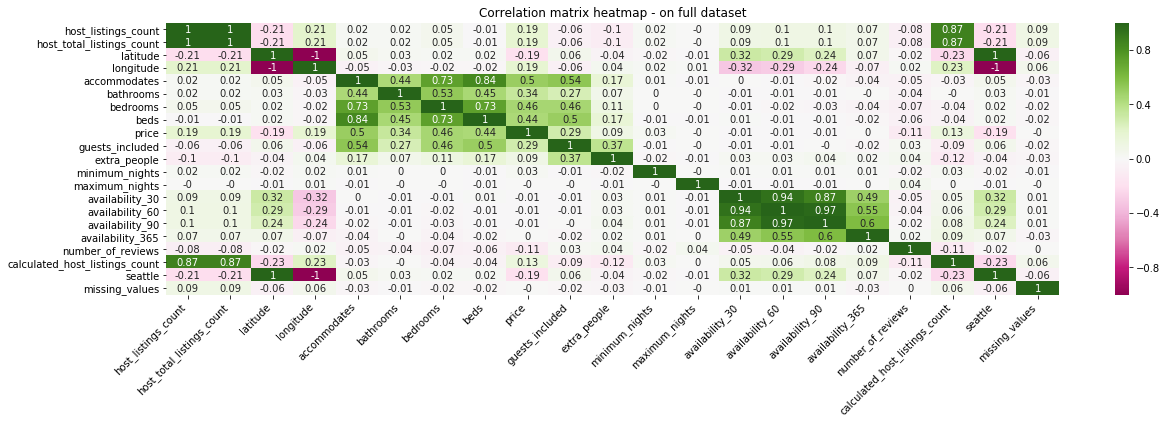

In [85]:
plt.figure(figsize=(20,5))
ax = sns.heatmap(round(df56r.corr(),2), annot = True, cmap='PiYG')
plt.title('Correlation matrix heatmap - on full dataset')
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);
plt.savefig("heatmap_mis.png")

>__Comments:__<br>
The row or column `seattle` marks the differences in correaltions by the two investigated cities. The strongest relations with the listing being from Seattle (vs. Boston) are:
- number of missing values (as `missing_values`): listings in Seatte tend to have less missing values
- number of available days in 30 days (as `availability_30`): listings in Seattle are more likely to be available (similar but weaker correlation stands for `availability_60`)
- number of listings by the host (as `host_listings_count`, `host_total_listings_count`, and `calculated_host_listings_count`): for listings in Seattle, the number is typically lower.

## 5) &nbsp; &nbsp; Evaluation

__Answers to the questions:__
1. To which extent is data available on listings of Boston and Seattle Aribnbs? Is there a significant difference in the availability of data for the two cities?
>- In the complete dataset the proportion of Boston and that of Seattle data are similar, around 50-50%.
>- There are around 94 features available for both cities' datasets.
>- The extent of missing data is very high for both cities. Beyond `listing_id`, price is the most widely available feature for the listing records although it only yields cca. 40% of all records.
>- There are several features which are fully missing from the Boston dataset but are at least partially available for Seattle.
2. Does more information provision correlate with more favorable outcomes for a host? E.g. better prices, more reviews or better review score values
>- There is no clear relation between the extent of missing values and prices.
>- The availability of data does, however, correlate with the number of reviews and the monthly number of reviews. The listings for which a large proportion (cca. > 30-50%) of the features were missing did hardly not receive any reviews. Interestingly, the largest number of reviews were achieved by listings which had a few missing data entries while the most complete records did not beat the competition.
>- In terms of average review scores, no clear pattern could be identified.

3. Are there significant differences between the two cities’ apartment offers?
>There are some significant differences in the listings available in Boston vs. in Seattle. Among the listings offered in Boston...
>- there is a larger proportion of private rooms
>- cancellation policy is flexible in a larger proportion.
>The distribution of number of beds per listing and that of the number of reviews is similar for the two cities.

In [86]:
end_full = time.time()

t = end_full - start_full

print('------------ \n Time spent on running the full script: \n ', int(t/60), 'minutes', round(t%60,2), 'seconds')

------------ 
 Time spent on running the full script: 
  24 minutes 42.95 seconds
